In [46]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
def rossler_integration(x_init, y_init, z_init, dt, N):
    """
    Simulates the Rossler attractor using numerical integration by Runge-Kuttar method.
    
    Parameters:
        x_init (float): initial x variables value (adimensional)
        y_init (float): initial x variables value (adimensional)
        z_init (float): initial z variables value (adimensional)
        dt (float): time step (in seconds)
        N (int): number of iteration of the simulation (adimensional)
        
    Returns:
        t (array): time values (in seconds)
        x (array): x variables (adimensional)
    """
    # Parameters of the Rossler attractor
    a = 0.15
    b = 0.20
    c = 10.0

    # Initialize time and variables arrays
    t_final = N * dt
    t = np.arange(0, t_final, dt)
    
    x = np.zeros_like(t) 
    y = np.zeros_like(t) 
    z = np.zeros_like(t) 
    
    x[0] = x_init
    y[0] = y_init
    z[0] = z_init

    # Numerical integration using Runge-Kutta 4 method
    for i in range(1, len(t)):
        
        # k1
        k1_x = dt * (-y[i-1] - z[i-1])
        k1_y = dt * (x[i-1] + a * y[i-1])
        k1_z = dt * (b + z[i-1] * (x[i-1] - c))
        
        # k2
        k2_x = dt * (-(y[i-1] + k1_y/2) - (z[i-1] + k1_z/2))
        k2_y = dt * ((x[i-1] + k1_x/2) + a * (y[i-1] + k1_y/2))
        k2_z = dt * (b + (z[i-1] + k1_z/2) * ((x[i-1] + k1_x/2) - c))
        
        # k3
        k3_x = dt * (-(y[i-1] + k2_y/2) - (z[i-1] + k2_z/2))
        k3_y = dt * ((x[i-1] + k2_x/2) + a * (y[i-1] + k2_y/2))
        k3_z = dt * (b + (z[i-1] + k2_z/2) * ((x[i-1] + k2_x/2) - c))
        
        # k4
        k4_x = dt * (-(y[i-1] + k3_y) - (z[i-1] + k3_z))
        k4_y = dt * ((x[i-1] + k3_x) + a * (y[i-1] + k3_y))
        k4_z = dt * (b + (z[i-1] + k3_z) * ((x[i-1] + k3_x) - c))
        
        
        # Variables update
        x[i] = x[i-1] + 1/6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y[i] = y[i-1] + 1/6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        z[i] = z[i-1] + 1/6 * (k1_z + 2*k2_z + 2*k3_z + k4_z)



    return t, x, y, z

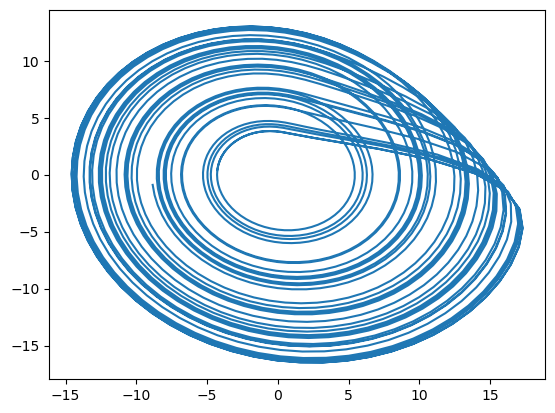

In [30]:
N_tot = 2300
dt = 0.1
t_tot, x, y, z = rossler_integration(0.1, -1, 0, dt, N_tot)

transient = 300
N = N_tot - transient
t = t_tot[: N_tot - transient]
x = x[transient:]
y = y[transient:]
z = z[transient:]

plt.plot(x, y)
plt.show()

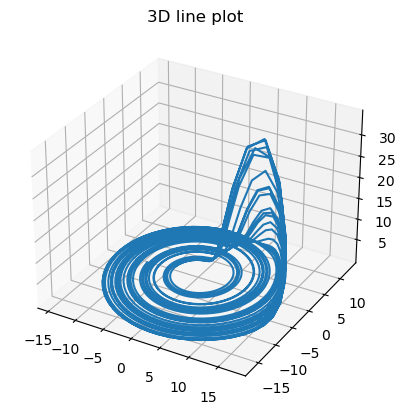

In [31]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.plot3D(x, y, z)
ax.set_title('3D line plot')
plt.show()

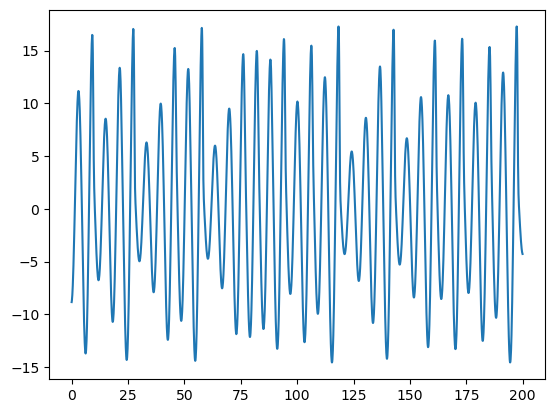

In [5]:
plt.plot(t,x)
plt.show()

**attractor reconstruction**

the implemented code below holds for integer value of J (the lag). The attractor dynamics is reconstructed using the method of delays

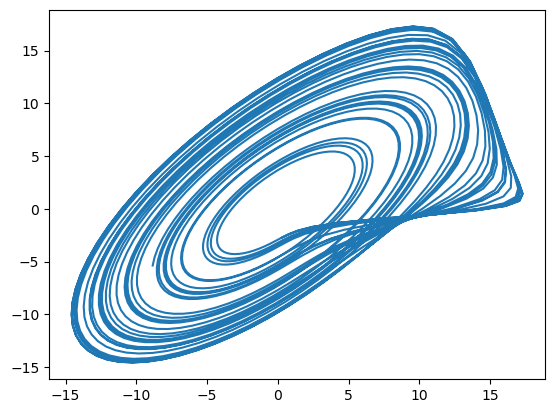

In [6]:
m = 3
J = 8
M = N - (m - 1) * J
X = np.zeros((M, m))
for i in range(M):
    for k in range(m):
        X[i][k] = x[i + J * k]
plt.plot(X.T[0], X.T[1])
plt.show()

**computation of mean period of the time serie**

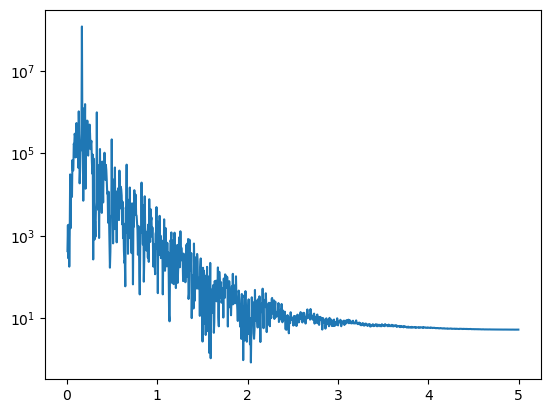

In [7]:
ps = np.abs(np.fft.fft(x))**2
dt = 0.1
freqs = np.fft.fftfreq(N, dt)
plt.semilogy(freqs[1:N//2], ps[1:N//2])
plt.show()

In [8]:
mean_f = np.average(freqs[1:N//2], weights=ps[1:N//2])
mean_T = 1/mean_f
print("frequenza media dello spettro in frequenza =", np.round(mean_f, 2))
print("periodo medio della serie temporale =", np.round(mean_T, 2))

frequenza media dello spettro in frequenza = 0.17
periodo medio della serie temporale = 5.83


In [16]:
%%time
#cercando fino al 60-esimo nearest neighbor sono sicuro ci sia uno che vada bene: 60*dt > mean_T
nbrs = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

Wall time: 2.28 s


array([[   0, 1518, 1640, ..., 1520,  972, 1884],
       [   1, 1519, 1641, ...,  184,  973, 1521],
       [   2, 1520, 1642, ...,  185,  974, 1339],
       ...,
       [1981, 1191,  585, ..., 1438,  589,  285],
       [1982, 1192,  586, ...,  590,  286, 1197],
       [1983, 1193,  587, ...,  591, 1440,  287]], dtype=int64)

In [17]:
# voglio fare il check che l'algoritmo precedente funzioni davvro
# ricalcolo il nearest neighbor per un punto generico dell'orbita ricostruita
ref_point = 1981
min_d = 5000000
count = ref_point
for r in range(M):
    d_ref = np.linalg.norm(X[ref_point] - X[r])
    if d_ref < min_d and r!=ref_point:
        min_d = d_ref
        count = r
print(count)
# sembra essere corretto

1191


In [18]:
# mi serve per verificare che nella prima colonna di indices sia ok...
for i in range(len(indices.T[0])):
    if indices.T[0][i] != i:
        print('hello')
print('fine check')
# tutto ok!

fine check


In [19]:
# check per il constraint temporale dei primi vicini
t = 0
for j in range(indices.shape[0]):
    if (np.abs(indices[j][0] - indices[j][1]) * dt) <= mean_T:
        t += 1
print('number of points that violates the temporal constraint =', t)
# va adottato il check!

number of points that violates the temporal constraint = 33


In [ ]:
# questo risultato è particolare...

for j in range(indices.shape[0]):
    print(np.abs(indices[j][0] - indices[j][1]))
# la distanza in indici tra primi vicini forma dei cluster... non me lo aspettavo!    

In [34]:
distances_list = []
i_max = 400
# non c'è bisogno di non conteggiare i primi punti, anche perchè è una procedura che del tutto non mi spiego... 
# UPDATE: è invece cosa buona e giusta a mio avviso inserire un check sulla distanza dei primi vicini 
# per assicurarci che effettivamente siano dei punti vicini tra loro

for j in range(M - i_max):  
    #check constraint temporale
    r = 1 #inizio a contare dal primo vicino
    
    while (np.abs(indices[j][0] - indices[j][r]) * dt) <= mean_T:
    #while (np.abs(indices[j][0] - indices[j][r]) * dt) <= mean_T and np.linalg.norm(distances[j][0] - distances[j][r]) >= 1:
        r += 1
    k = indices[j][r]

    #check sull'evoluzione temporale della distanza d_j
    if (k + i_max) <= (M - 1):
        d_j = np.zeros(i_max + 1)
        for i in range(i_max + 1):
            d_j[i] = np.linalg.norm(X[j + i] - X[k + i])
        
        distances_list.append(d_j)

In [35]:
print('evoluzione temporale di', i_max)
print("punti ricostruiti per cui è possibile fare l'evoluzione temporale", len(distances_list))
print("punti ricostruiti per cui NON è possibile fare l'evoluzione temporale", M - len(distances_list))

evoluzione temporale di 400
punti ricostruiti per cui è possibile fare l'evoluzione temporale 998
punti ricostruiti per cui NON è possibile fare l'evoluzione temporale 986


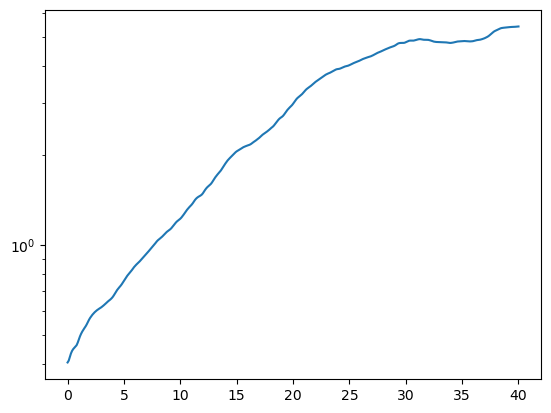

In [39]:
d = np.zeros(i_max + 1)
for r in range(len(distances_list)):
    d = d + distances_list[r]
d = d / len(distances_list)
plt.semilogy(np.linspace(0, i_max, i_max + 1)*dt, d)

lambda_atteso = 0.090
# WARNING: la costante moltiplicativa 0.5 ha valore arbitrario!
y_ross = 0.5 * np.exp(np.linspace(0, i_max, i_max + 1) * dt * lambda_atteso) 
#plt.semilogy(np.linspace(0, i_max, i_max + 1)*dt, y_ross, linestyle='--')

plt.show()

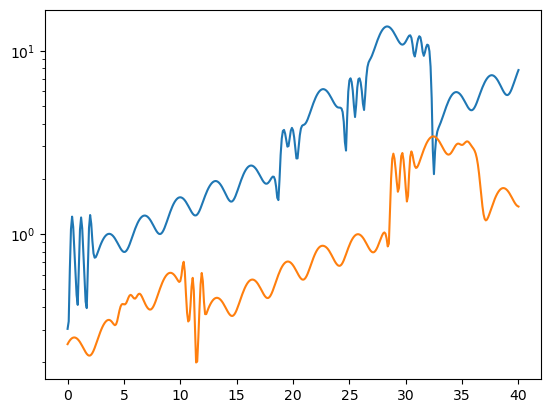

In [37]:
# calcoliamo l'evoluzione della distanza tra un punto j_ref e il suo nearest neighbor
j_ref_1 = 200
plt.semilogy(np.linspace(0, i_max, i_max + 1)*dt, distances_list[j_ref_1])
# qua si capisce bene il perchè si forma quel plateau -> osservalo per tempi lunghi i_max=1000, ad esempio
j_ref_2 = 100
plt.semilogy(np.linspace(0, i_max, i_max + 1)*dt, distances_list[j_ref_2])

plt.show()


fit lineare per il calcolo dell'esponente di Lyapunov maggiore

In [166]:
from scipy.optimize import curve_fit
def func(x, m, q):
    return x * m + q

x_data = np.linspace(70, 150, 81)*dt
y_data = np.log(d[70:151])
popt, pcov = curve_fit(func, x_data, y_data)
popt, pcov

### Calcolo del lag (J) ottimale
il calcolo viene eseguito tramite la costruzione della funzione di autocorrelazione associata alla serie temporale x(t)

In [43]:
# variance coefficient
C_0 = np.var(x)

# autocovariance function
h_max = 40
C_h = np.zeros(h_max)

for h in range(1, h_max + 1):
    for i in range(len(x) - h):
        C_h[h - 1] += (x[i] - np.mean(x)) * (x[i + h] - np.mean(x))
    C_h[h - 1] = (C_h[h - 1] / len(x))    
        
C_h = (C_h / C_0)
print('the optimal lag is', np.argmin(np.abs(C_h - C_h[0] * (1 - 1/np.e))) + 1)

the optimal lag is 8


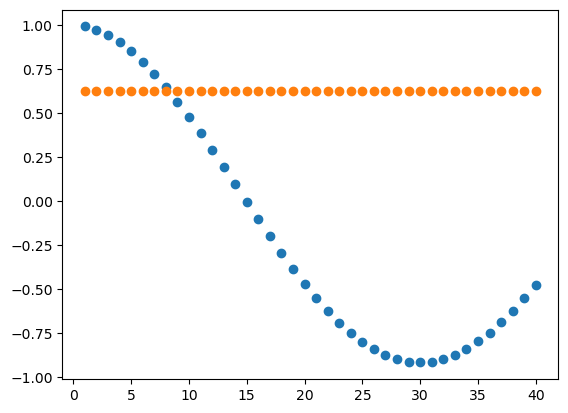

In [41]:
# plot della funzione di autocorrelazione al variare del time lag h
plt.scatter(np.linspace(1, h_max, h_max), C_h)
plt.scatter(np.linspace(1, h_max, h_max), np.ones_like(C_h)*(C_h[0] * (1 - 1/np.e)))
plt.show()
# già da qua si vede che il migliore è h=8, comunque non sembra male anche h=9 che in realtà da i risultati migliori...

### Additive noise
we consider the effect of additive noise, i.e., measurement or instrumentation noise.

In [58]:
# the variance of the signal x(t) is fixed
# I choose the SNR (Signal to Noise Ratio) = Variance signal / Variance noise (or Power signal / Power noise)
# WARNING: numpy unfortunatly works using the std instead of variance -> std(noise) = std(signal) / sqrt(SNR)
SNR = 100 
sigma_noise = np.std(x) / np.sqrt(SNR)
# mean
mu_noise = 0
white_noise = np.random.normal(mu_noise, sigma_noise, len(x))

In [59]:
x_noisy = x + white_noise

una volta aggiunto il rumore alla serie temporale x(t) i passaggi da svolgere sono gli stessi del caso senza rumore

### Non-chaotic systems 

partiamo da serie temporali associate/generate da sistemi non caotici che conosciamo e vogliamo utilizzare la procedura 
utilizzata per l'attrattore di Rossler per riconoscere e differenziare serie temporali generate da sistemi caotici e non.

**Ricordati** che per tali sistemi vengono generate delle serie temporali che comprendono 2000 punti

In [38]:
N_non_caos = 2000

**Quasiperiodic time series (two torus)**

viene esplicitamente specificato il sampling period dt=0.01

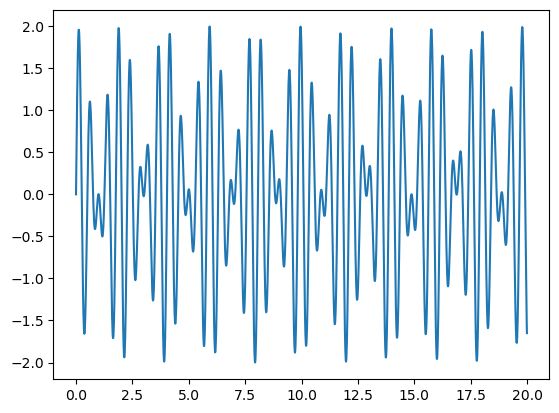

In [34]:
f_1 = 1.732051
f_2 = 2.236068
t_quasi_per = np.arange(0, N_non_caos * 0.01, 0.01)
x_quasi_per = np.sin(2 * np.pi * f_1 * t_quasi_per) + np.sin(2 * np.pi * f_2 * t_quasi_per)

plt.plot(t_quasi_per, x_quasi_per)
plt.show()

a questo punto si segue la stessa procedura, fino al plot <ln d_j(idt)> vs idt

**White noise**

**Oss. 1**: non viene specificato il sampling period in questo caso. Scelgo per convenzione di considerare dt=0.01 
come nel precedente sistema non caotico

**Oss. 2**: non viene dato nessuna specifica sul white noise... per semplicità potrei considerare un Gaussian White Noise. A questo punto si pone la questione di specificare media e std della distruzione normale che genera la serie. Per la media assumo un valore pari a 0 mentre per la std magari paragonabile a quella del segnale precedente, facendo un check che tale scelta non ha un impatto reale su quella che andiamo a concludere.